In [139]:
import pyforest

In [140]:
df = pd.read_csv('data/HIST_PAINEL_COVIDBR_13mar2021.csv')

<IPython.core.display.Javascript object>

In [141]:
df.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Norte,RO,Alta Floresta D'Oeste,11,110001,11005.0,ZONA DA MATA,3/27/20,13.0,22945.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
1,Norte,RO,Alta Floresta D'Oeste,11,110001,11005.0,ZONA DA MATA,3/28/20,13.0,22945.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
2,Norte,RO,Alta Floresta D'Oeste,11,110001,11005.0,ZONA DA MATA,3/29/20,14.0,22945.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
3,Norte,RO,Alta Floresta D'Oeste,11,110001,11005.0,ZONA DA MATA,3/30/20,14.0,22945.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
4,Norte,RO,Alta Floresta D'Oeste,11,110001,11005.0,ZONA DA MATA,3/31/20,14.0,22945.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037497 entries, 0 to 1037496
Data columns (total 17 columns):
regiao                    1037497 non-null object
estado                    1037497 non-null object
municipio                 1033273 non-null object
coduf                     1037497 non-null int64
codmun                    1037497 non-null int64
codRegiaoSaude            1033273 non-null float64
nomeRegiaoSaude           1033273 non-null object
data                      1033273 non-null object
semanaEpi                 1033273 non-null float64
populacaoTCU2019          1029049 non-null float64
casosAcumulado            1033273 non-null float64
casosNovos                1033273 non-null float64
obitosAcumulado           1033273 non-null float64
obitosNovos               1033273 non-null float64
Recuperadosnovos          0 non-null float64
emAcompanhamentoNovos     0 non-null float64
interior/metropolitana    1029049 non-null float64
dtypes: float64(10), int64(2), object(5)


In [143]:
df.isna().sum()

regiao                          0
estado                          0
municipio                    4224
coduf                           0
codmun                          0
codRegiaoSaude               4224
nomeRegiaoSaude              4224
data                         4224
semanaEpi                    4224
populacaoTCU2019             8448
casosAcumulado               4224
casosNovos                   4224
obitosAcumulado              4224
obitosNovos                  4224
Recuperadosnovos          1037497
emAcompanhamentoNovos     1037497
interior/metropolitana       8448
dtype: int64

In [144]:
df.municipio.dropna(inplace=True)

In [145]:
df.isna().sum()

regiao                          0
estado                          0
municipio                    4224
coduf                           0
codmun                          0
codRegiaoSaude               4224
nomeRegiaoSaude              4224
data                         4224
semanaEpi                    4224
populacaoTCU2019             8448
casosAcumulado               4224
casosNovos                   4224
obitosAcumulado              4224
obitosNovos                  4224
Recuperadosnovos          1037497
emAcompanhamentoNovos     1037497
interior/metropolitana       8448
dtype: int64

In [146]:
df.columns

Index(['regiao', 'estado', 'municipio', 'coduf', 'codmun', 'codRegiaoSaude',
       'nomeRegiaoSaude', 'data', 'semanaEpi', 'populacaoTCU2019',
       'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos',
       'Recuperadosnovos', 'emAcompanhamentoNovos', 'interior/metropolitana'],
      dtype='object')

In [147]:
df.drop(columns=['coduf', 'codmun', 'codRegiaoSaude','nomeRegiaoSaude', 'semanaEpi', 'emAcompanhamentoNovos'], inplace=True)

In [148]:
df.columns

Index(['regiao', 'estado', 'municipio', 'data', 'populacaoTCU2019',
       'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos',
       'Recuperadosnovos', 'interior/metropolitana'],
      dtype='object')

In [149]:
df.columns = ['region', 'state', 'city', 'date', 'population',
       'total_cases', 'new_cases', 'total_death', 'new_death',
       'new_recovered',  'country/urban']

In [150]:
df.head()

,region,state,city,date,population,total_cases,new_cases,total_death,new_death,new_recovered,country/urban
0,Norte,RO,Alta Floresta D'Oeste,3/27/20,22945.0,0.0,0.0,0.0,0.0,NaN,0.0
1,Norte,RO,Alta Floresta D'Oeste,3/28/20,22945.0,0.0,0.0,0.0,0.0,NaN,0.0
2,Norte,RO,Alta Floresta D'Oeste,3/29/20,22945.0,0.0,0.0,0.0,0.0,NaN,0.0
3,Norte,RO,Alta Floresta D'Oeste,3/30/20,22945.0,0.0,0.0,0.0,0.0,NaN,0.0
4,Norte,RO,Alta Floresta D'Oeste,3/31/20,22945.0,0.0,0.0,0.0,0.0,NaN,0.0


In [151]:
df.city.dropna(inplace=True)

In [152]:
df

,region,state,city,date,population,total_cases,new_cases,total_death,new_death,new_recovered,country/urban
0,Norte,RO,Alta Floresta D'Oeste,3/27/20,22945.0,0.0,0.0,0.0,0.0,NaN,0.0
1,Norte,RO,Alta Floresta D'Oeste,3/28/20,22945.0,0.0,0.0,0.0,0.0,NaN,0.0
2,Norte,RO,Alta Floresta D'Oeste,3/29/20,22945.0,0.0,0.0,0.0,0.0,NaN,0.0
3,Norte,RO,Alta Floresta D'Oeste,3/30/20,22945.0,0.0,0.0,0.0,0.0,NaN,0.0
4,Norte,RO,Alta Floresta D'Oeste,3/31/20,22945.0,0.0,0.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1037492,Sudeste,MG,Santa Rita de Minas,8/22/20,7212.0,106.0,0.0,2.0,0.0,NaN,0.0
1037493,Sudeste,MG,Santa Rita de Minas,8/23/20,7212.0,106.0,0.0,2.0,0.0,NaN,0.0
1037494,Sudeste,MG,Santa Rita de Minas,8/24/20,7212.0,106.0,0.0,2.0,0.0,NaN,0.0
1037495,Sudeste,MG,Santa Rita de Minas,8/25/20,7212.0,111.0,5.0,2.0,0.0,NaN,0.0


<IPython.core.display.Javascript object>

<BarContainer object of 1 artists>

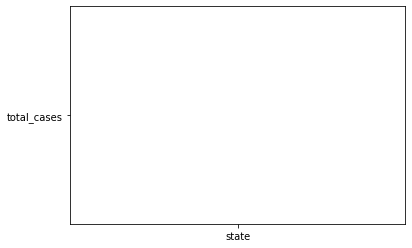

In [155]:
plt.bar(x='state', height='total_cases')